<a href="https://colab.research.google.com/github/Goldi-Ai/PRODIGY_DS_01/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 World Bank Population Data Analysis

This project explores the **World Bank Population dataset** to understand global population trends from 1960 to 2020.  
It combines **population data** with **metadata (regions & income groups)** for deeper insights.  

### 🔎 Key Features of Analysis
- Distribution of population across countries (Histogram)
- Top 10 most populous countries in 2020
- Region-wise average population
- Growth trends of major countries (India, China, USA)
- Share of world population by top 5 countries (Pie Chart)

### 📂 Dataset Used
- **Population Dataset:** API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv  
- **Metadata:** Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv  

This notebook demonstrates **data cleaning, merging, visualization, and storytelling** using Python libraries:  
`pandas`, `matplotlib`, and `seaborn`.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/Dataset/API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv", skiprows=4)

In [6]:
print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print(df.head())

✅ Dataset Loaded Successfully
Shape: (266, 70)
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017

In [7]:
meta_country = pd.read_csv("../Dataset/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv")

print("\n✅ Metadata Loaded")
print(meta_country.head())


✅ Metadata Loaded
  Country Code                                             Region  \
0          ABW                          Latin America & Caribbean   
1          AFE                                                NaN   
2          AFG  Middle East, North Africa, Afghanistan & Pakistan   
3          AFW                                                NaN   
4          AGO                                 Sub-Saharan Africa   

           IncomeGroup                                       SpecialNotes  \
0          High income                                                NaN   
1                  NaN  26 countries, stretching from the Red Sea in t...   
2           Low income  The reporting period for national accounts dat...   
3                  NaN  22 countries, stretching from the westernmost ...   
4  Lower middle income  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eas

In [8]:
df_meta = df.merge(meta_country, left_on="Country Code", right_on="Country Code", how="left")

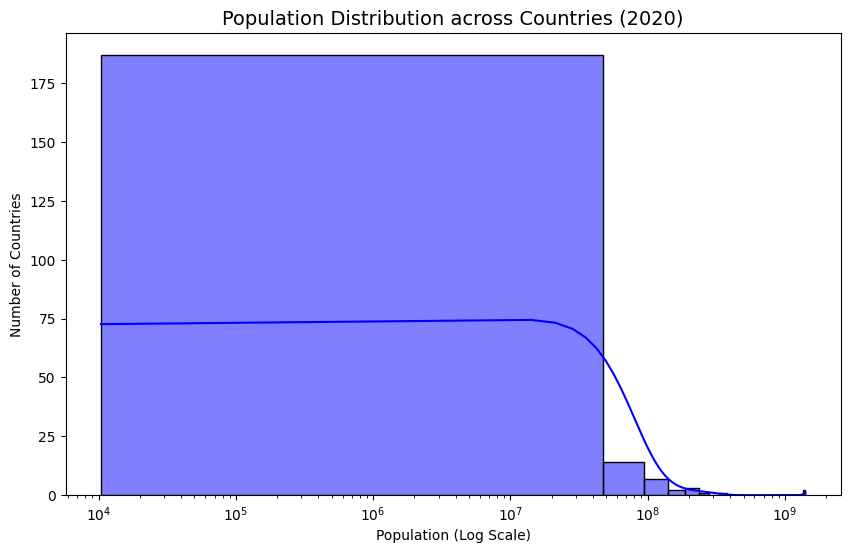

In [9]:
#Population Distribution (2020) - Histogram
df_2020 = df_meta[["Country Name", "2020", "Region"]].dropna()

plt.figure(figsize=(10,6))
sns.histplot(df_2020["2020"], bins=30, kde=True, color="blue")
plt.title("Population Distribution across Countries (2020)", fontsize=14)
plt.xlabel("Population (Log Scale)")
plt.ylabel("Number of Countries")
plt.xscale("log")  # log scale because population is skewed
plt.show()

/tmp/ipython-input-2204097609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2020", y="Country Name", data=top10, palette="viridis")


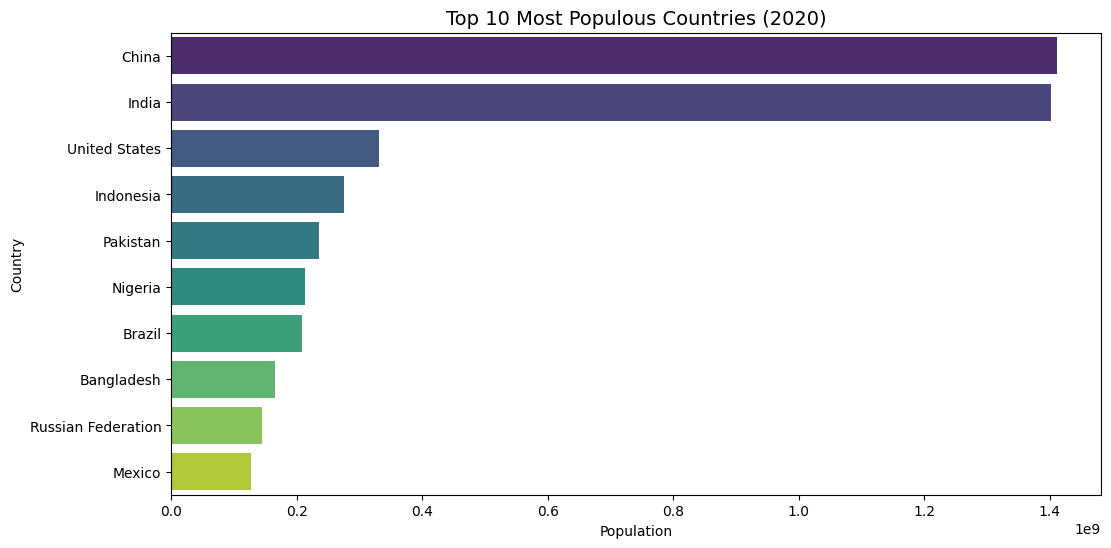

In [10]:
#Top 10 Most Populous Countries (2020) - Bar Chart
top10 = df_2020.sort_values("2020", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="2020", y="Country Name", data=top10, palette="viridis")
plt.title("Top 10 Most Populous Countries (2020)", fontsize=14)
plt.xlabel("Population")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-355534658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_pop.values, y=region_pop.index, palette="magma")


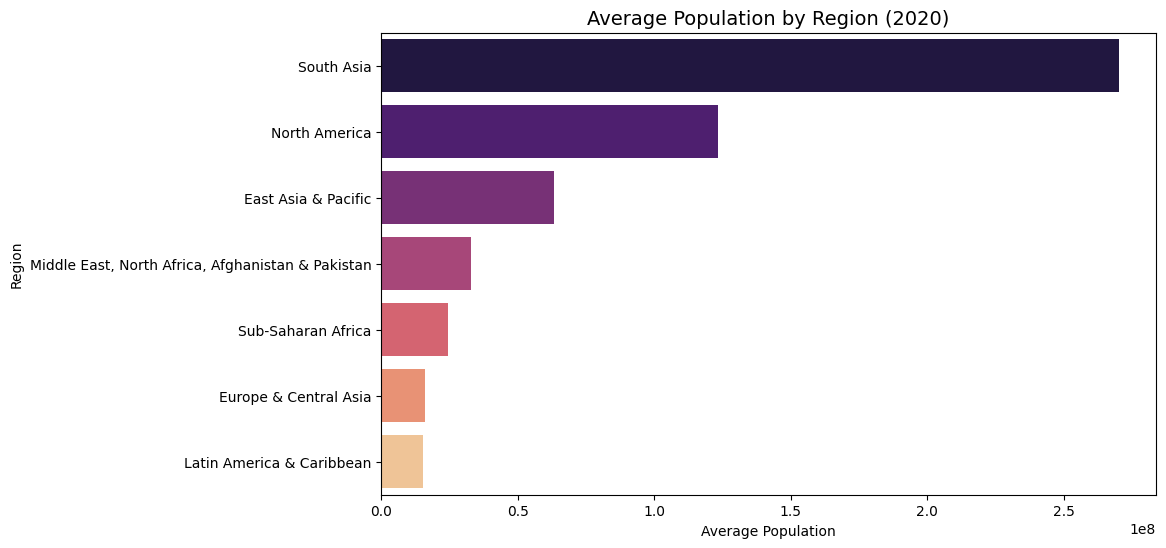

In [11]:
#Region-wise Average Population (2020) - Bar Chart
region_pop = df_2020.groupby("Region")["2020"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_pop.values, y=region_pop.index, palette="magma")
plt.title("Average Population by Region (2020)", fontsize=14)
plt.xlabel("Average Population")
plt.ylabel("Region")
plt.show()

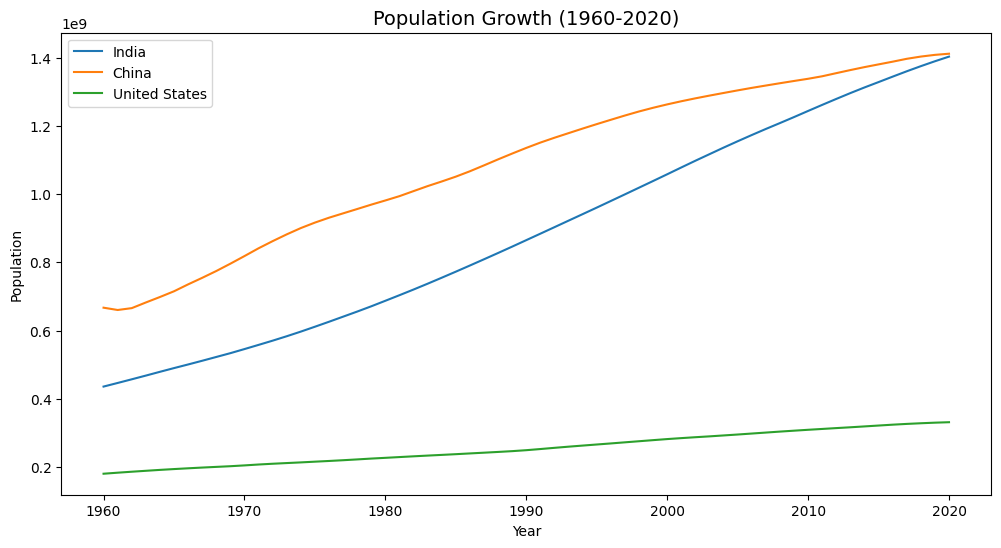

In [12]:
#Population Growth Trend - India, China, USA
countries = ["India", "China", "United States"]

trend = df[df["Country Name"].isin(countries)]
trend = trend.set_index("Country Name")

# Extract only year columns
years = [str(y) for y in range(1960, 2021)]
trend = trend[years].T
trend.index = pd.to_datetime(trend.index)

plt.figure(figsize=(12,6))
for c in countries:
    plt.plot(trend.index, trend.loc[:, c], label=c)

plt.title("Population Growth (1960-2020)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()

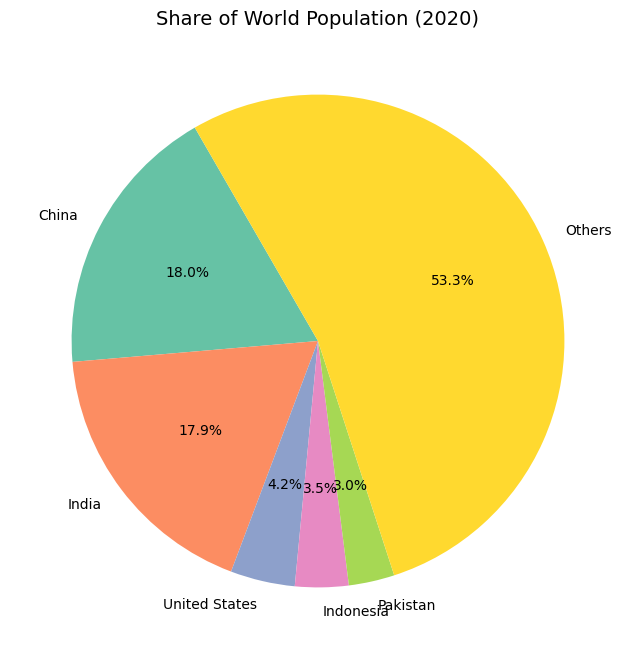

In [13]:
#Pie Chart - Share of World Population (Top 5 countries)
world_2020 = df_2020.sort_values("2020", ascending=False).head(5)
others = pd.DataFrame({"Country Name":["Others"], "2020":[df_2020["2020"].sum() - world_2020["2020"].sum()]})
world_share = pd.concat([world_2020, others])

plt.figure(figsize=(8,8))
plt.pie(world_share["2020"], labels=world_share["Country Name"], autopct="%1.1f%%", startangle=120, colors=sns.color_palette("Set2"))
plt.title("Share of World Population (2020)", fontsize=14)
plt.show()

---

## 🎉 Thank You!

Thank you for exploring this project on **World Bank Population Data Analysis**.  
I hope you enjoyed the journey of uncovering global population insights through data visualization.  

If you liked this project:
- ⭐ Star the repository on GitHub
- 📬 Connect with me on [LinkedIn](https://www.linkedin.com/in/amisha6828)
- 👩‍💻 Explore my other projects on [GitHub](https://github.com/Goldi-Ai)

**Happy Learning & Keep Exploring Data! 🚀**
